In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.DataFrame({'x': np.random.normal(size=int(1e7)), 'y': np.random.normal(size=int(1e7))})

<Axes: xlabel='x', ylabel='y'>

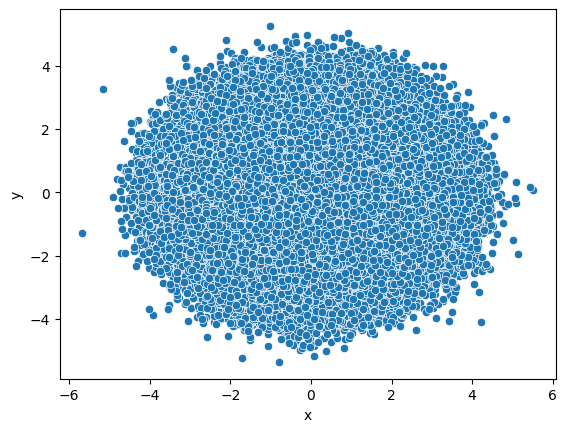

In [20]:
sns.scatterplot(data, x='x', y='y')

In [21]:
# Import libraries and set desired options
import os
import pickle
import numpy as np
import pandas as pd
from scipy.sparse import hstack
# !pip install eli5
import eli5
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display_html

In [25]:
times = ['time%s' % i for i in range(1, 11)]

In [33]:
train_df = pd.read_csv('/Users/nikolaj/Downloads/train_sessions.csv',
                   index_col='session_id', parse_dates=times)
train_df = train_df.sort_values(by='time1')

In [34]:
train_times = train_df[times]
y_train = train_df['target'].astype('int').values

In [35]:
session_start_hour = train_times['time1'].apply(lambda ts: ts.hour).values

In [38]:
session_start_hour, y_train

(array([ 8,  8,  8, ..., 23, 23, 23], shape=(253561,)),
 array([0, 0, 0, ..., 0, 0, 0], shape=(253561,)))

<Axes: ylabel='count'>

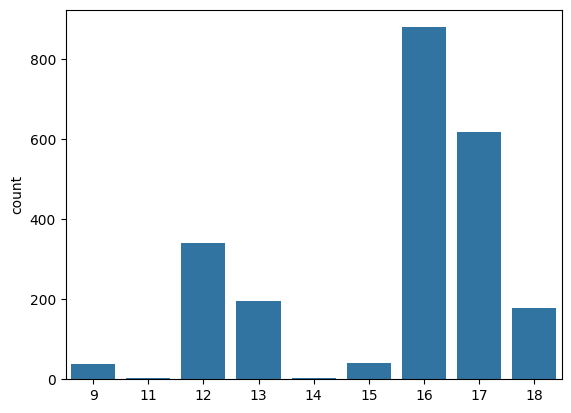

In [55]:
sns.countplot(x=session_start_hour[y_train == 1])

In [63]:
with open('/Users/nikolaj/Downloads/site_dic.pkl', 'rb') as f:
        site2id = pickle.load(f)
# create an inverse id _> site mapping
id2site = {v:k for (k, v) in site2id.items()}
# we treat site with id 0 as "unknown"
id2site[0] = 'unknown'

In [57]:
 sites = ['site%s' % i for i in range(1, 11)]

In [68]:
# train_df[sites].fillna(0).astype('int')\
                 # .apply(lambda row: ' '.join([id2site[i] for i in row]), axis=1).tolist()

In [69]:
train_df.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
21669,56,2013-01-12 08:05:57,55.0,2013-01-12 08:05:57,NaN,NaT,NaN,NaT,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0
54843,56,2013-01-12 08:37:23,55.0,2013-01-12 08:37:23,56.0,2013-01-12 09:07:07,55.0,2013-01-12 09:07:09,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0
77292,946,2013-01-12 08:50:13,946.0,2013-01-12 08:50:14,951.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:16,...,2013-01-12 08:50:16,948.0,2013-01-12 08:50:16,784.0,2013-01-12 08:50:16,949.0,2013-01-12 08:50:17,946.0,2013-01-12 08:50:17,0
114021,945,2013-01-12 08:50:17,948.0,2013-01-12 08:50:17,949.0,2013-01-12 08:50:18,948.0,2013-01-12 08:50:18,945.0,2013-01-12 08:50:18,...,2013-01-12 08:50:18,947.0,2013-01-12 08:50:19,945.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:20,0
146670,947,2013-01-12 08:50:20,950.0,2013-01-12 08:50:20,948.0,2013-01-12 08:50:20,947.0,2013-01-12 08:50:21,950.0,2013-01-12 08:50:21,...,2013-01-12 08:50:21,946.0,2013-01-12 08:50:21,951.0,2013-01-12 08:50:22,946.0,2013-01-12 08:50:22,947.0,2013-01-12 08:50:22,0
